<h1>Predicting possibility of Heart Attack using Logistic Regression</h1>

<h2>Importing common libraries</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importing the health care dataset from Kaggle</h2>

In [2]:
url='https://drive.google.com/file/d/1ycRzDrnFFD59RdKkMTFp9wR5NoUGCRNk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

heartData=pd.read_csv(path)

<h2>Perform Exploratory Data Analysis</h2>

In [3]:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heartData.shape

(303, 14)

In [5]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


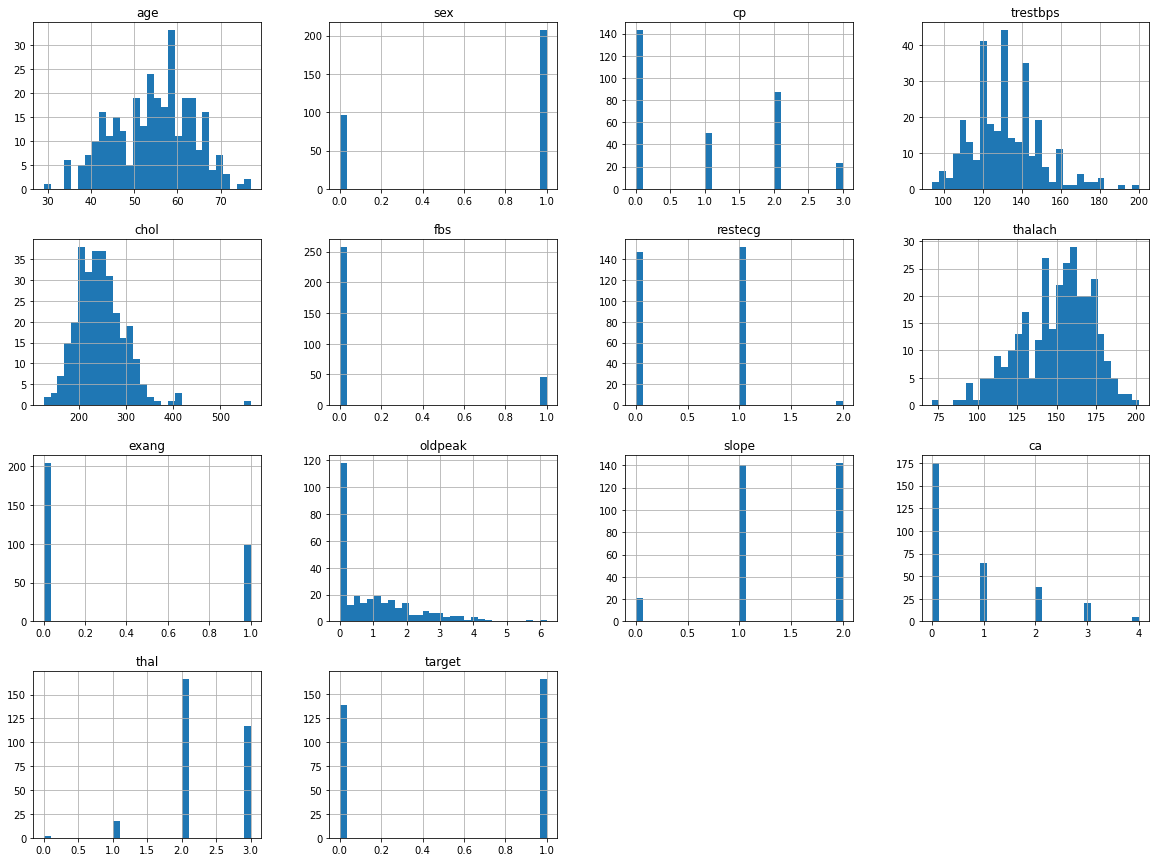

In [7]:
heartData.hist(bins=30, figsize=(20,15))
plt.show()

In [8]:
catAttributes = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
nonCatAttributes = ["age", "trestbps", "chol", "thalach", "oldpeak"]

<h2>Visualize dataset using boxplot and countplot</h2>

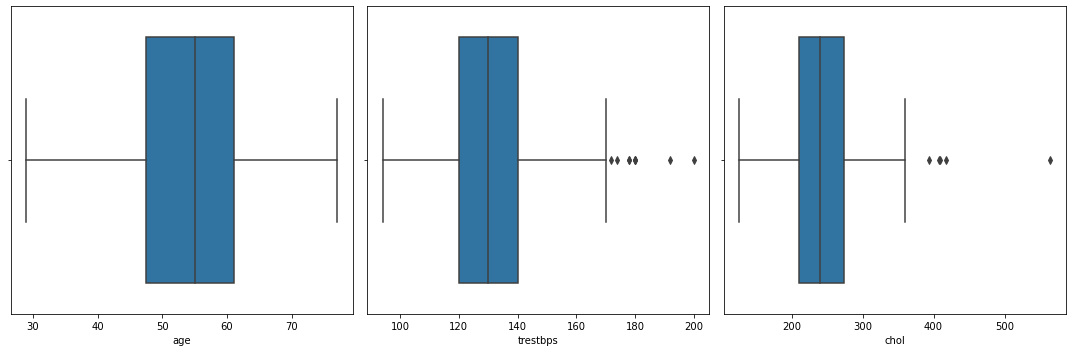

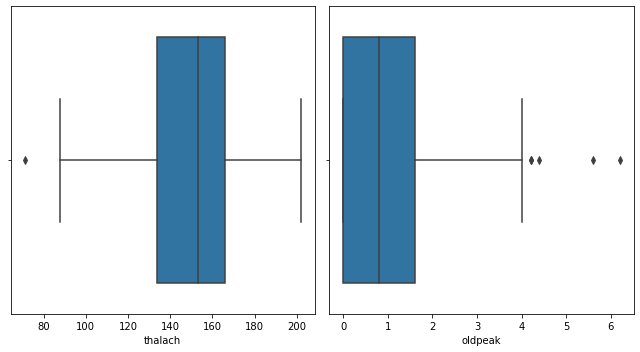

In [9]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))
for q in range(0, 3):
    sns.boxplot(x=nonCatAttributes[q], data=heartData, ax=ax[q])
plt.tight_layout()
    
fig,ax = plt.subplots(1, 2, figsize=(9, 5))
for q in range(0, 2):
    sns.boxplot(x=nonCatAttributes[q+3], data=heartData, ax=ax[q])
plt.tight_layout()

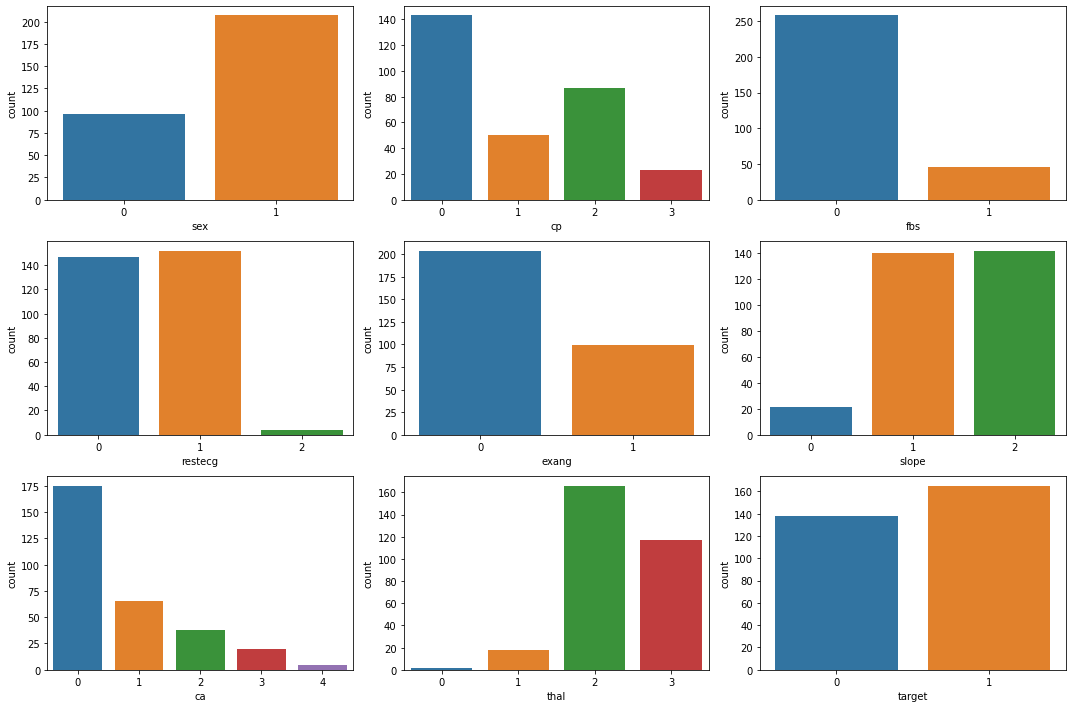

In [10]:
fig,ax = plt.subplots(3,3, figsize=(15, 10))
for q in range(0, 3):
    for w in range(0, 3):
        sns.countplot(x=catAttributes[3*q+w], data=heartData, ax=ax[q][w])
plt.tight_layout()

<h2>Visualize correlation between all variables in the dataset</h2>

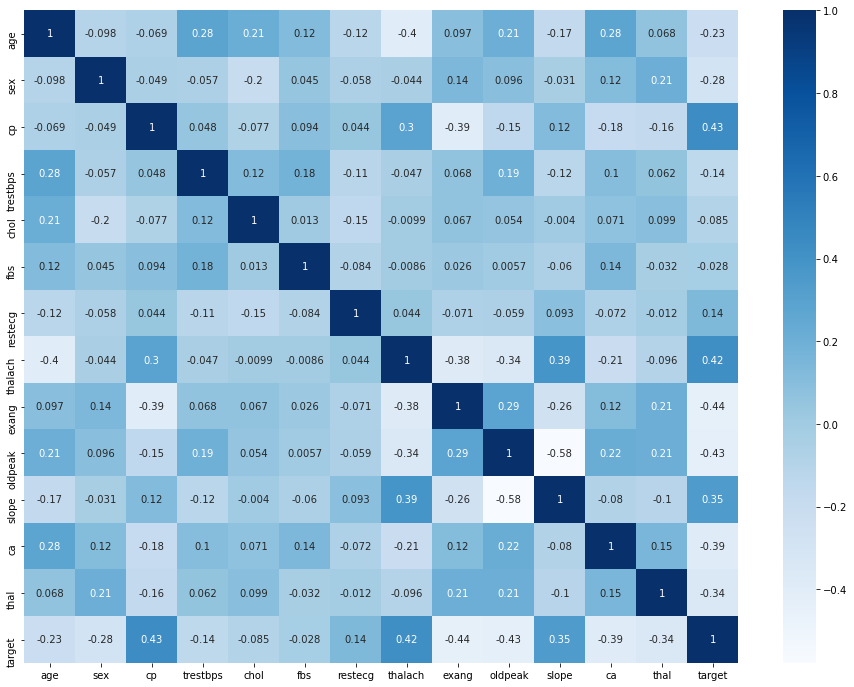

In [11]:
plt.figure(figsize= (16,12))
correlation = heartData.corr()
sns.heatmap(correlation, annot = True, cmap = "Blues")
plt.show()

<h2>Identify X and Y variables and split into train and test data</h2>

In [12]:
X = heartData.drop(["target"], axis=1)
Y = heartData["target"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [14]:
X_train.shape

(242, 13)

In [15]:
X_test.shape

(61, 13)

<h2>Performing 10-fold cross validation</h2>

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="sag", max_iter=10000)

In [17]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=10)
print("Average train accuracy: ", scores_train.mean())

scores_test = cross_val_score(model, X_test, Y_test, scoring="accuracy", cv=10)
print("Average test accuracy: ", scores_test.mean())

Average train accuracy:  0.8268333333333333
Average test accuracy:  0.8333333333333334


<h2>Training a Logistic regression model</h2>

In [18]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [19]:
Y_predict = model.predict(X_test)

<h2>Computing accuracy and confusion matrix</h2>

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_predict)
print(acc * 100)

85.24590163934425


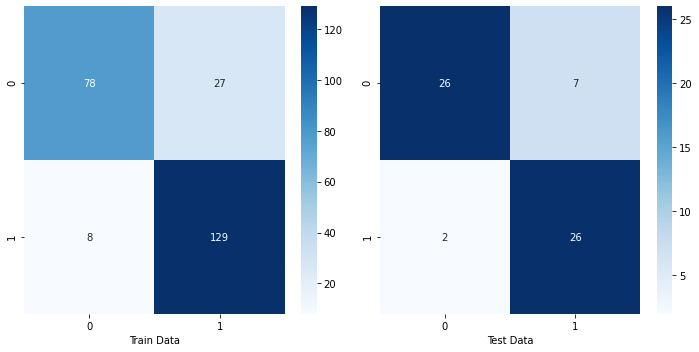

In [21]:
from sklearn.metrics import confusion_matrix 

Y_train_predict = model.predict(X_train)
train_conf_matrix = confusion_matrix(Y_train, Y_train_predict) 
test_conf_matrix = confusion_matrix(Y_test, Y_predict)

fig,ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(train_conf_matrix, cmap='Blues', fmt='d', annot=True, ax=ax[0])
ax[0].set_xlabel('Train Data')
sns.heatmap(test_conf_matrix, cmap='Blues', fmt='d', annot=True, ax=ax[1])
ax[1].set_xlabel('Test Data')
plt.tight_layout()

<h2>Visualizing train and test results, and plotting the decision boundary</h2>

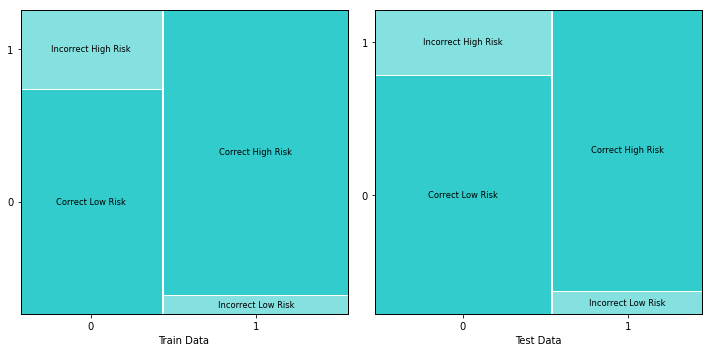

In [22]:
from statsmodels.graphics.mosaicplot import mosaic

def labelizer(key):
    return {('0','0'): 'Correct Low Risk', ('0', '1'): 'Incorrect High Risk', ('1','0'): 'Incorrect Low Risk', ('1','1'): 'Correct High Risk'}[key]

def prop(key):
    if key==('0', '0') or key==('1', '1'):
        return {'color': '#33cccc'}
    return {'color': '#85e0e0'}

fig,ax = plt.subplots(1, 2, figsize=(10, 5))
mosaic(train_conf_matrix, properties=prop, gap=0.01, labelizer=labelizer, ax=ax[0])
ax[0].set_xlabel('Train Data')
mosaic(test_conf_matrix, properties=prop, gap=0.009, labelizer=labelizer, ax=ax[1])
ax[1].set_xlabel('Test Data')
plt.tight_layout()

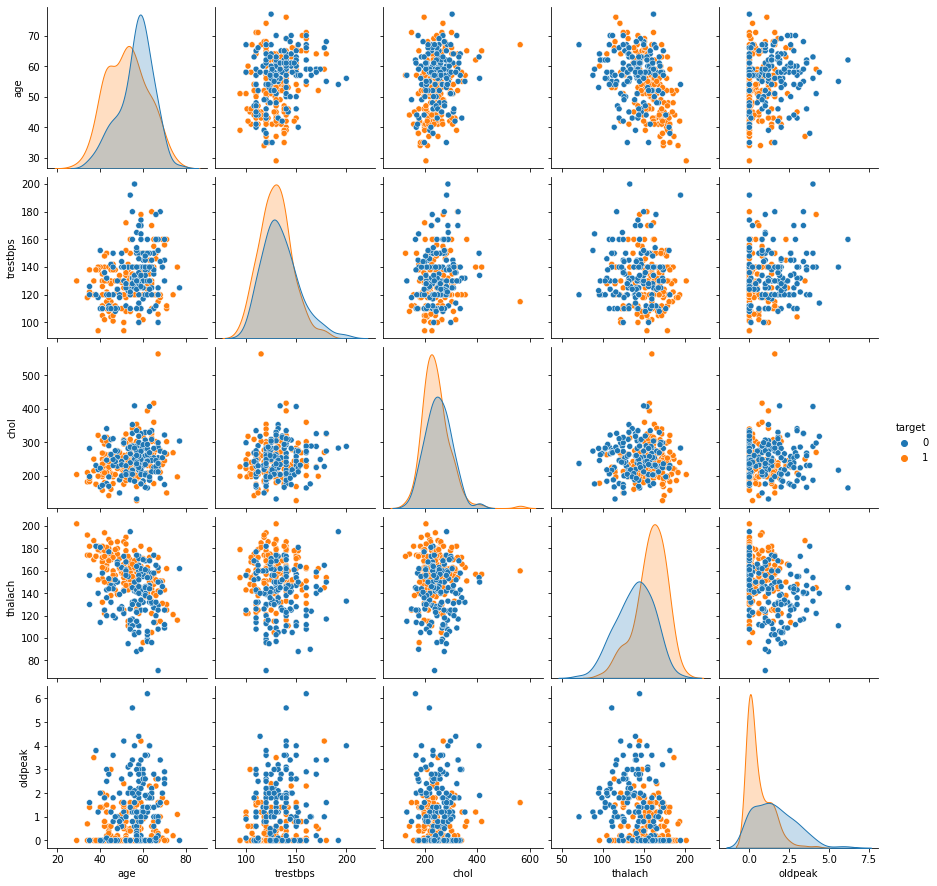

In [23]:
nonCatWithTarget = nonCatAttributes + ["target"]
sns.pairplot(heartData[nonCatWithTarget], hue="target")
plt.show()

In [24]:
tat_heart_data = heartData[["thalach", "age", "target"]]

In [25]:
tat_heart_data.head()

,thalach,age,target
0,150,63,1
1,187,37,1
2,172,41,1
3,178,56,1
4,163,57,1


In [26]:
X = tat_heart_data.drop(["target"], axis=1)
Y = tat_heart_data["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [27]:
model = LogisticRegression(solver="sag", max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [28]:
Y_predict = model.predict(X_test)

In [29]:
acc = accuracy_score(Y_test, Y_predict)
print(acc * 100)

77.04918032786885


In [30]:
b = model.intercept_[0]
w1, w2 = model.coef_.T

c = -b/w2
m = -w1/w2

xmin, xmax = 80, 200
ymin, ymax = 30, 100
xd = np.array([xmin, xmax])
yd = m*xd + c

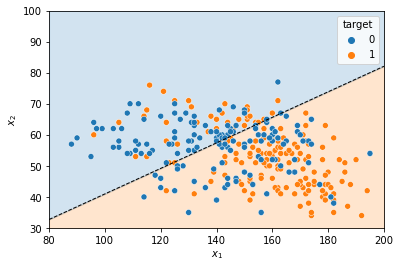

In [31]:
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

sns.scatterplot(data=tat_heart_data, x="thalach", y="age", hue="target")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()